In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import keras
import keras.utils
from keras import utils as np_utils

In [ ]:
import tensorflow.keras.layers
import tensorflow as tf



In [ ]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import concatenate
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Flatten, Dense, Activation, BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.optimizers import SGD, Adam
import cv2
import numpy as np


In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
train_datagen_with_aug = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen_with_aug.flow_from_directory(
    r'/content/drive/My Drive/Dataset/DR',
    target_size=(224, 224),
    batch_size=32,
    # color_mode='grayscale',
    class_mode='categorical',
    subset='training'
    ) # set as training data

validation_generator = train_datagen_with_aug.flow_from_directory(
    r'/content/drive/My Drive/Dataset/DR', # same directory as training data
    target_size=(224, 224),
    batch_size=32,
    # color_mode='grayscale',
    class_mode='categorical',
    subset='validation'
    ) # set as validation data

input_img = Input(shape=(224, 224, 3))

Found 2208 images belonging to 5 classes.
Found 552 images belonging to 5 classes.


In [ ]:
from keras.applications import densenet

DENSENET_169 = Sequential()

densenet169_model = keras.applications.densenet.DenseNet169(
    include_top=False, weights='imagenet',
    input_shape=(224,224,3), pooling=('max'), classes=5
)

51877672/51877672 [==============================] - 0s 0us/step


In [ ]:
import keras
from keras.layers import Dense, Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet169
import tensorflow.keras.applications


# Load DenseNet-169 model without top layers
densenet169_model = DenseNet169(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Create a Sequential model
DENSENET_169 = keras.models.Sequential()

# Set layers in densenet169_model to non-trainable
for layer in densenet169_model.layers:
    layer.trainable = False

# Add layers to the model
DENSENET_169.add(densenet169_model)
DENSENET_169.add(Flatten())
DENSENET_169.add(Dropout(0.2))
DENSENET_169.add(Dense(1024, activation='relu'))
DENSENET_169.add(Dropout(0.2))
DENSENET_169.add(Dense(512, activation='relu'))
DENSENET_169.add(Dense(5, activation='softmax'))

# Compile the model
adam = Adam(learning_rate=0.001)
DENSENET_169.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy',precision_m, recall_m, f1_m])

# Assuming you have your ImageDataGenerators set up
# train_generator = ...
# validation_generator = ...

# Train the model
graph = DENSENET_169.fit(train_generator, epochs=25, validation_data=validation_generator)


# Print the results
print(graph.history)


Epoch 1/25
69/69 [==============================] - 29s 256ms/step - loss: 75.1081 - accuracy: 0.5376 - val_loss: 0.9610 - val_accuracy: 0.6630
Epoch 2/25
69/69 [==============================] - 16s 234ms/step - loss: 0.9850 - accuracy: 0.6553 - val_loss: 0.8185 - val_accuracy: 0.7120
Epoch 3/25
69/69 [==============================] - 15s 212ms/step - loss: 0.8608 - accuracy: 0.6839 - val_loss: 0.8172 - val_accuracy: 0.7138
Epoch 4/25
69/69 [==============================] - 15s 212ms/step - loss: 0.8089 - accuracy: 0.7020 - val_loss: 0.7904 - val_accuracy: 0.7101
Epoch 5/25
69/69 [==============================] - 16s 225ms/step - loss: 0.7783 - accuracy: 0.7097 - val_loss: 0.7841 - val_accuracy: 0.7156
Epoch 6/25
69/69 [==============================] - 15s 220ms/step - loss: 0.7698 - accuracy: 0.7192 - val_loss: 0.7418 - val_accuracy: 0.7210
Epoch 7/25
69/69 [==============================] - 15s 212ms/step - loss: 0.7669 - accuracy: 0.7215 - val_loss: 0.8444 - val_accuracy: 0.659

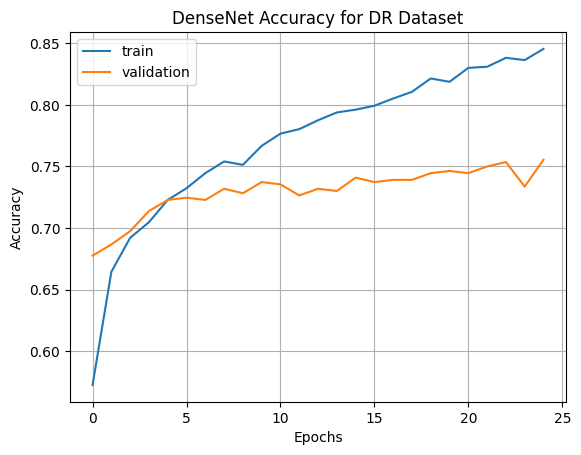

In [ ]:
import matplotlib.pyplot as plt

fig1 = plt.gcf()

plt.plot(graph.history['accuracy'])
plt.plot(graph.history['val_accuracy'])

# plt.axis(ymin=0.4, ymax=1)
plt.grid()

plt.title('DenseNet Accuracy for DR Dataset')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','validation'])

plt.show()

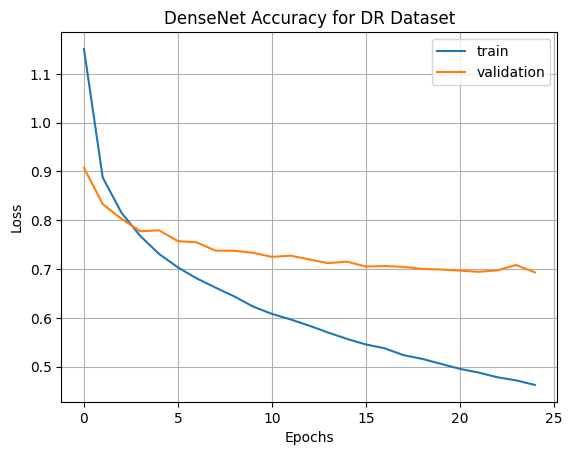

In [ ]:
import matplotlib.pyplot as plt

fig1 = plt.gcf()

plt.plot(graph.history['loss'])
plt.plot(graph.history['val_loss'])

# plt.axis(ymin=0.4, ymax=1)
plt.grid()

plt.title('DenseNet Accuracy for DR Dataset')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train','validation'])

plt.show()